In [3]:
import numpy as np
import glob
import argparse
import logging
import itertools
import sys
import scipy as sp
import scipy.stats
import os
import matplotlib
import matplotlib.pyplot as plt
import pickle

In [67]:
"""
EXPERIMENT PARAMETERS
"""
RESULTS_PKL = './old_eigenval_results.pkl'
TITLE = 'ResNet34 on CIFAR10'

In [68]:
results = pickle.load(open(RESULTS_PKL, 'rb'))

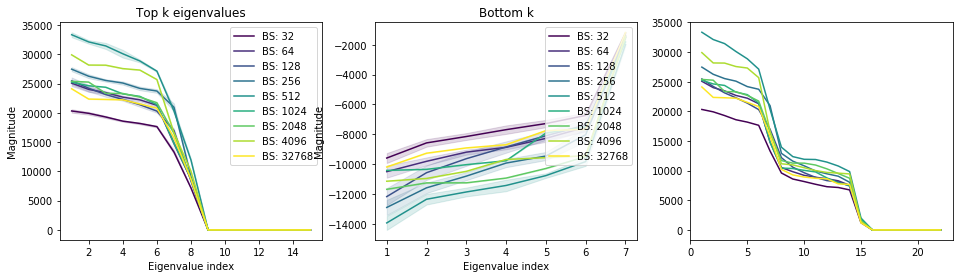

In [71]:
f, axes = plt.subplots(1, 3, sharey=False)
f.set_figheight(4)
f.set_figwidth(16)


def mean_confidence_interval(means, stds, n=2, confidence=0.95):
    h = stds * sp.stats.t._ppf((1+confidence)/2., n-1)
    return means, means-h, means+h

color_idx = np.linspace(.0, 1., len(results.keys()))
bs_int_values = sorted(results.keys())

n = 15
conf = 0.3

last_bot_ind = 7

for i, bs in zip(color_idx, bs_int_values):
    top_m, top_lb, top_ub = mean_confidence_interval(results[bs]['top_means'], results[bs]['top_stds'], n=n, confidence=conf)
    bot_m, bot_lb, bot_ub = mean_confidence_interval(results[bs]['bot_means'][:last_bot_ind], results[bs]['bot_stds'][:last_bot_ind], n=n, confidence=conf)
    x_values = range(1, len(results[bs]['top_means'])+1)
    color = plt.cm.viridis(i)
    
    axes[0].fill_between(x_values, top_ub, top_lb,
                     color=color, alpha=.15)
    axes[1].fill_between(x_values[:last_bot_ind], bot_ub, bot_lb,
                     color=color, alpha=.15)
    
    axes[0].plot(x_values, top_m, color=color, label='BS: ' + str(bs))
    axes[1].plot(x_values[:last_bot_ind], bot_m, color=color, label='BS: ' + str(bs))
    
    abs_values = np.abs(np.concatenate([top_m, bot_m]))
    abs_values[::-1].sort()
    axes[2].plot(range(1, len(abs_values)+1), abs_values, color=color, label=str(bs))
    
axes[0].set_title('Top k eigenvalues')
axes[1].set_title('Bottom k')
#axes[0].set_yscale('symlog')
#axes[1].set_yscale('symlog')
#axes[2].set_yscale('symlog')
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[0].set_ylabel('Magnitude')
axes[1].set_ylabel('Magnitude')

axes[0].set_xlabel('Eigenvalue index')
axes[1].set_xlabel('Eigenvalue index')
plt.show()